# Problema 2

En este problema y en toda ésta guía de problemas se utiliza la tabla descargada del catálogo de galaxias de la base de datos SDSS. Se trata de una tabla con la información de 1000 galaxias del DR16 con la clasificación de cada una como elíptica o espiral, las magnitudes Petrosian u, g y r y el redshift. En el repositorio "astrometria-g3", se adjunta la tabla y el query utilizado en la base de datos SDSS CasJobs para seleccionar la misma.

En este ejercicio se estudia la distribución de índices de color g-r y u-g para galaxias elípticas y espirales.

Se comienza cargando los datos que se van a necesitar.

In [1]:
#from math import *
import numpy as np
import matplotlib.pyplot as plt
#import random
import seaborn as sns
from scipy import stats as st

In [2]:
sns.set()

In [3]:
#defino la petroMag_u (columna 3)
u = np.genfromtxt('Tabla2_g3.csv', delimiter=',', usecols=3) 

#defino la petroMag_g (columna 4)
g = np.genfromtxt('Tabla2_g3.csv', delimiter=',', usecols=4)

#defino la petroMag_r (columna 5)
r = np.genfromtxt('Tabla2_g3.csv', delimiter=',', usecols=5) 

In [4]:
#el tipo de galaxia está determinado por 0 y 1 (igual a 1 --> ese tipo)

#espirales
n_espi= np.genfromtxt('Tabla2_g3.csv', delimiter=',', usecols=1) 

#elipticas
n_eli= np.genfromtxt('Tabla2_g3.csv', delimiter=',', usecols=2) 

In [5]:
#defino los índices de color

g_r=[]   #g-r
u_g=[]   #u-g
for i in range(len(u)):
    if (-9999 != g[i]) and (-9999 != r[i]): #hay valores de las magnitudes que valen -9999
        gr= g[i] - r[i]
        ug= u[i] - g[i]
        g_r.append(gr)
        u_g.append(ug)

## Distribución del índice de color g-r

In [6]:
#separo en espirales y elipticas

g_r_espi=[] #lista que va a tener los g-r de las espirales
g_r_eli=[]  #lista que va a tener los g-r de las elípticas

for i in range(len(g_r)):
    if (n_espi[i] == 1):   #es espiral 
        x= g_r[i]
        g_r_espi.append(x)
    else:            #si no es 1, es cero --> es eliptica
        y= g_r[i]
        g_r_eli.append(y)

In [7]:
len(g_r_espi)

779

In [8]:
len(g_r_eli)

219

Se grafica la distribución del índice de color g-r, separando las muestras para las galaxias elípticas y espirales:

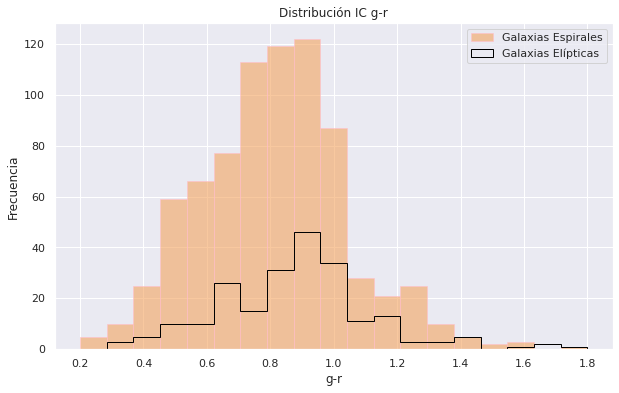

In [10]:
plt.figure(figsize=(10,6))

b=np.linspace(0.2,1.8,20)
plt.hist(g_r_espi, bins=b, label='Galaxias Espirales', color='sandybrown', ec='pink', alpha=0.6)            
plt.hist(g_r_eli, bins=b, histtype='step',label='Galaxias Elípticas', ec='black')

plt.title('Distribución IC g-r')
plt.xlabel('g-r')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.show()

Como las muestras de ambos tipos tienen distintas cantidades, se toma una muestra aleatoria de las galaxias espirales que tenga el mismo tamaño que las elípticas:


In [11]:
#muestra de espirales iguales al tamaño que las elípticas
g_r_espi2= np.random.choice(g_r_espi, size=219)

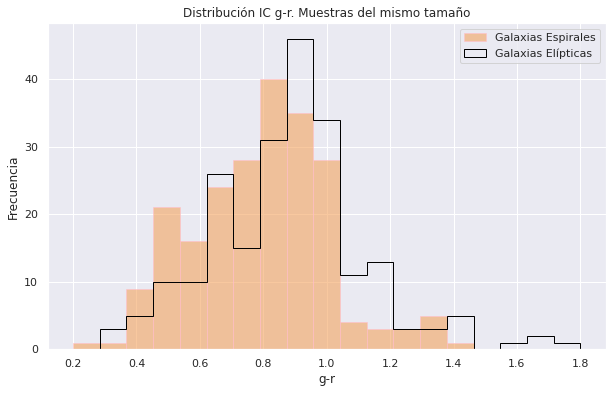

In [12]:
plt.figure(figsize=(10,6))

plt.hist(g_r_espi2, bins=b, label='Galaxias Espirales', color='sandybrown', ec='pink', alpha=0.6)            
plt.hist(g_r_eli, bins=b, histtype='step',label='Galaxias Elípticas', ec='black')

plt.title('Distribución IC g-r. Muestras del mismo tamaño')
plt.xlabel('g-r')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.show()

Para probar si las galaxias elípticas y espirales son del mismo color g-r o no, se comparan los histogramas obtenidos con cada muestra, para ver siguen la misma distribución. Para ello se realiza a continuación una prueba de hipótesis.

### 1. Hipótesis

*Hipótesis nula:* $H_0$ = las 2 muestras siguen la misma distribución
(las galaxias elípticas y espirales son del mismo color)

*Hipótesis alternativa:*
$H_1$ = las 2 muestras no siguen la misma distribución 
(las galaxias elípticas y espirales no son del mismo color)

### 2. Nivel de significación

$\alpha = 0.05$

### 3. Estadı́stico de prueba: 

En este caso como se cuenta con 2 distribuciones las cuales son ambas desconocidas, se podría utilizar el estadístico chi-cuadrado. El problema es que para éste estadístico es necesario conocer las frecuencias de cada bin del histograma, lo que lo hace dependiente del ancho de los bines y por lo tanto el resultado varía con ellos. 

Para evitar esto se utiliza el Método de Kolmogorov-Smirnov (KS) el cual es adecuado para variables aleatorias continuas.

El estadístico KS en este caso es el valor máximo del modulo de la diferencia entre dos $F_i$ (distribuciones acumuladas observadas):

$$d_{max}=max |F_{1}(x) - F_{2}(x)|$$


### 4. Zona de aceptación: 
Es la zona donde se acepta la $H_0$

Zona de aceptación: $d_{max}^{obser} \le d_{max}^{\alpha}$

Zona de rechazo: $d_{max}^{obser} > d_{max}^{\alpha}$

donde $\alpha$ es el nivel de significación, y  $d_{max}^{\alpha}$ se extrae de tablas.


Otra forma de definir la región de aceptación y rechazo es usando el valor-p: es la probabilidad de que un valor estadístico calculado sea posible dado una hipótesis nula cierta. Si el valor-p cumple con la condición de ser menor o igual que un nivel de significancia impuesto, permite rechazar la hipótesis nula. En cambio, si el valor-p es mayor que el $\alpha$ no se tiene la evidencia para rechazar la $H_0$.

### 5. Cómputos necesarios

En este caso se trabaja con la función 'st.ks_2samp' de scipy, la cual calcula el estadístico Kolmogorov-Smirnov en 2 muestras independientes de la misma distribución continua. Los valores que se obtienen son el estadístico KS y el valor de p (por default toma hipótesis alternativa de 2 colas).

In [13]:
#estadístico con las 2 muestras completas, hipótesis alternativas de 2 colas
st.ks_2samp(g_r_espi, g_r_eli)

KstestResult(statistic=0.1849696074466152, pvalue=1.3555701184109203e-05)

In [14]:
#estadístico con las muestras del mismo tamaño
st.ks_2samp(g_r_espi2, g_r_eli)

KstestResult(statistic=0.2146118721461187, pvalue=7.877115237016553e-05)

### 6. Decisión:

En este caso tanto el valor-p calculado con las dos muestras completas como con las muestras del mismo tamaño se cumple que $pvalue < \alpha=0.05$, la hipótesis nula se rechaza.

### 7. Conclusión:

Se cloncluye que las 2 muestras no siguen la misma distribución, por lo que las galaxias elípticas y espirales no son del mismo color g-r.

## Distribución del índice de color u-g

Se procede de la misma forma que para el caso g-r

In [15]:
#separo en espirales y elípticas

u_g_espi=[] #lista que va a tener los u-g de las espirales
u_g_eli=[]  #lista que va a tener los u-g de las elípticas

for i in range(len(u_g)):
    if n_espi[i] == 1:   #es espiral
        x= u_g[i]
        u_g_espi.append(x)
    else:            #si no es 1, es cero --> es eliptica
        y= u_g[i]
        u_g_eli.append(y)

In [16]:
len(u_g_espi)

779

In [17]:
len(u_g_eli)

219

Se grafica la distribución del índice de color u-g, separando las muestras para las galaxias elípticas y espirales:

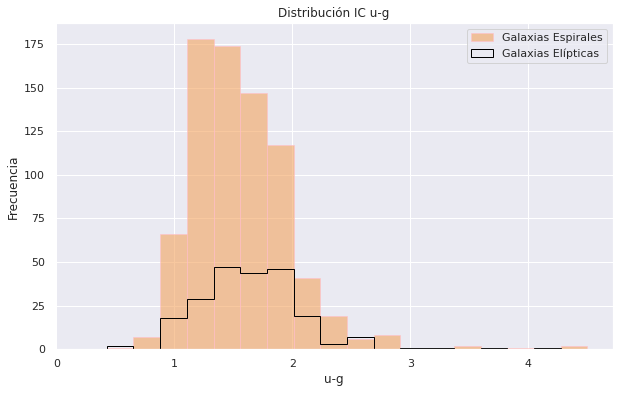

In [18]:
plt.figure(figsize=(10,6))

c=np.linspace(0.2,4.5,20)
plt.hist(u_g_espi, bins=c, label='Galaxias Espirales', color='sandybrown', ec='pink', alpha=0.6)            
plt.hist(u_g_eli, bins=c, histtype='step',label='Galaxias Elípticas', ec='black')

plt.title('Distribución IC u-g')
plt.xlabel('u-g')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.show()

Como las muestras de ambos tipos tienen distintas cantidades, se toma una muestra aleatoria de las galaxias espirales que tenga el mismo tamaño que las elípticas:

In [19]:
#muestra de las espirales del mismo tamaño que las elípticas
u_g_espi2= np.random.choice(u_g_espi, size=219)

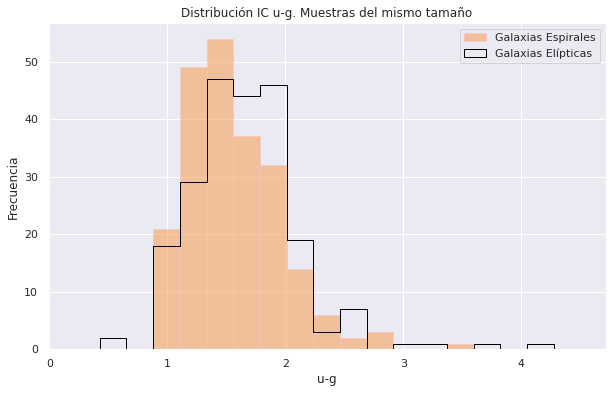

In [21]:
plt.figure(figsize=(10,6))

plt.hist(u_g_espi2, bins=c, label='Galaxias Espirales', color='sandybrown', ec='pink', alpha=0.6)            
plt.hist(u_g_eli, bins=c, histtype='step',label='Galaxias Elípticas', ec='black')

plt.title('Distribución IC u-g. Muestras del mismo tamaño')
plt.xlabel('u-g')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.show()

Se realiza una prueba de hipótesis para probar si las galaxias elípticas y espirales son del mismo color u-g o no.

### 1. Hipótesis

$H_0$ = las 2 muestras siguen la misma distribución
(las galaxias elípticas y espirales son del mismo color)

$H_1$ = las 2 muestras no siguen la misma distribución 
(las galaxias elípticas y espirales no son del mismo color)

### 2. Nivel de significación: 
$\alpha = 0.05$

### 3. Estadı́stico de prueba:
Kolmogorov-Smirnov (KS)

### 4. Zona de aceptación:  

$d_{max}^{obser} \le d_{max}^{\alpha}$ 

o si se cumple:

$pvalue > \alpha$

### 5. Cómputos necesarios:

In [22]:
#estadístico con las 2 muestras completas, hipótesis alternativas de 2 colas
st.ks_2samp(u_g_espi, u_g_eli)

KstestResult(statistic=0.12546233609416124, pvalue=0.008262759877671444)

In [23]:
#estadístico con las muestras del mismo tamaño
st.ks_2samp(u_g_espi2, u_g_eli)

KstestResult(statistic=0.136986301369863, pvalue=0.032714439015967794)

### 6. Decisión:

En este caso tanto el valor-p calculado con las dos muestras completas como con las muestras del mismo tamaño se cumple que $pvalue < \alpha=0.05$, la hipótesis nula se rechaza.

### 7. Conclusión:

Se cloncluye que las galaxias elípticas y espirales no siguen la misma distribución del mismo color u-g.

## Conclusión:
En este ejercicio por medio de el método de Kolmogorov-Smirnov se prueba que la distribución de índices de color g-r y u-g no es la misma para galaxias de tipo elípticas y espirales.
Esto se pudo realizar sin conocer la distribución original de cada muestra, solo usando la función de scipy: stats.ks_2samp para comparar 2 muestras observadas y utilizando el valor-p obtenido con la misma.